In [1]:
from sklearn import svm,datasets
from pandas.io.parsers import read_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from scipy import stats

In [2]:
#data import
icshape_125 = pd.read_csv('./ml/icshape.125-r1.18s.list',header=None,names=['x'])
score_125 = pd.read_csv('./ml/score.NAIN3-125-r1.T2t200.18s.list',header=None,names=['x'])
score_125_t500 = pd.read_csv('./ml/score.NAIN3-125-r1.T2t500.18s.list',header=None,names=['x'])
score_125_ext70 = pd.read_csv('./ml/score.NAIN3-125-r1.ex70.T2t200.18s.list',header=None,names=['x'])
score_125_ext150 = pd.read_csv('./ml/score.NAIN3-125-r1.ex150.T2t200.18s.list',header=None,names=['x'])
icshape_paris = pd.read_csv('./ml/invivo.icSHAPE.18s.na.list',header=None,names=['x'])
#score_paris = pd.read_csv('../score.invivo.target.rRNA.t200.18S.na.list',header=None,names=['x'])
icshape_sl_cy = pd.read_csv('./ml/icSHAPE.1.18s.na.list',header=None,names=['x'])
standard = pd.read_csv('./ml/18S_human.bcolor',header=None,names=['x'])
accessibility = read_table('./ml/18s_o2_sasa.sort.txt',header=None)
#standard = pd.read_csv('../../human_18s_con.ct',header=None,sep='\t')[2]
#flist = ['icshape_25','ml_125','ml_25','ml_125_t500','ml_125_t700','icshape_paris','icshape_sl']
X_test = [icshape_125,score_125,score_125_t500,score_125_ext70,score_125_ext150,icshape_paris,icshape_sl_cy]
y = standard
accessibility.columns = ['a','b','c']
#accessibility['a']
y.head()

,x
0,1
1,1
2,1
3,0
4,0


               x   y          a
count  56.000000  56  56.000000
mean    0.342786   1  55.658482
std     0.381083   0  16.979121
min     0.011000   1  30.799000
25%     0.051500   1  41.216750
50%     0.132500   1  52.855500
75%     0.569250   1  68.286000
max     1.000000   1  99.858000
               x   y          a
count  76.000000  76  76.000000
mean    0.083908   0  49.805289
std     0.140797   0  13.721127
min     0.010000   0  30.342000
25%     0.018500   0  39.293000
50%     0.040000   0  47.812000
75%     0.090000   0  56.155000
max     1.000000   0  87.974000


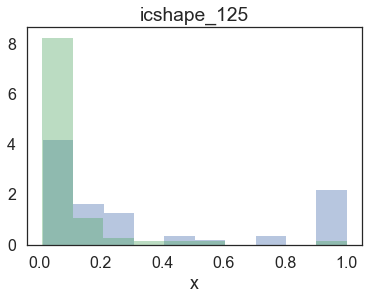

               x   y          a
count  61.000000  61  61.000000
mean    0.355852   1  55.682705
std     0.379317   0  16.482542
min     0.017005   1  30.799000
25%     0.068108   1  41.221000
50%     0.158467   1  54.478000
75%     0.596957   1  67.587000
max     1.000000   1  99.858000
               x   y          a
count  99.000000  99  99.000000
mean    0.115861   0  49.645869
std     0.166780   0  13.911486
min     0.010317   0  30.119000
25%     0.026739   0  38.983000
50%     0.060196   0  47.799000
75%     0.146021   0  56.682000
max     1.000000   0  87.974000


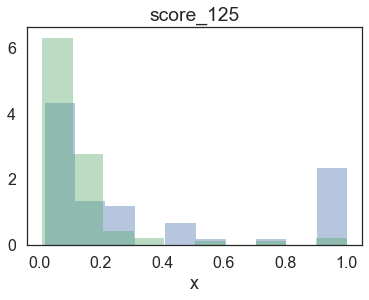

               x   y          a
count  62.000000  62  62.000000
mean    0.350279   1  56.013081
std     0.378746   0  16.552574
min     0.010317   1  30.799000
25%     0.060395   1  41.256750
50%     0.151244   1  54.888000
75%     0.574079   1  67.746750
max     1.000000   1  99.858000
                x    y           a
count  108.000000  108  108.000000
mean     0.107066    0   49.383759
std      0.162280    0   13.763408
min      0.010317    0   30.119000
25%      0.021572    0   38.935250
50%      0.056150    0   47.595000
75%      0.139474    0   57.051750
max      1.000000    0   87.974000


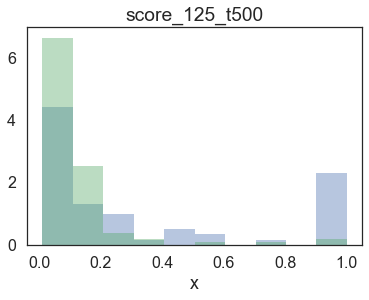

               x   y          a
count  62.000000  62  62.000000
mean    0.360666   1  56.013081
std     0.379481   0  16.552574
min     0.012305   1  30.799000
25%     0.074673   1  41.256750
50%     0.173233   1  54.888000
75%     0.683631   1  67.746750
max     1.000000   1  99.858000
                x    y           a
count  108.000000  108  108.000000
mean     0.109395    0   49.383759
std      0.162809    0   13.763408
min      0.012305    0   30.119000
25%      0.021844    0   38.935250
50%      0.058225    0   47.595000
75%      0.136421    0   57.051750
max      1.000000    0   87.974000


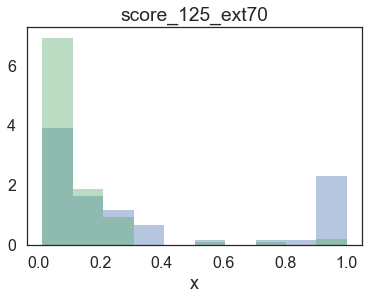

               x   y          a
count  62.000000  62  62.000000
mean    0.373594   1  56.013081
std     0.367819   0  16.552574
min     0.013805   1  30.799000
25%     0.098201   1  41.256750
50%     0.199699   1  54.888000
75%     0.507797   1  67.746750
max     1.000000   1  99.858000
                x    y           a
count  108.000000  108  108.000000
mean     0.102652    0   49.383759
std      0.150402    0   13.763408
min      0.013805    0   30.119000
25%      0.024602    0   38.935250
50%      0.052574    0   47.595000
75%      0.124058    0   57.051750
max      1.000000    0   87.974000


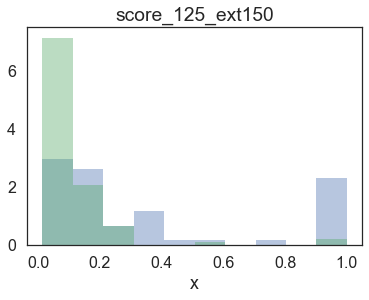

               x   y          a
count  34.000000  34  34.000000
mean    0.498412   1  58.802000
std     0.399755   0  17.995811
min     0.016000   1  30.799000
25%     0.124250   1  41.726750
50%     0.326000   1  55.892500
75%     1.000000   1  72.122750
max     1.000000   1  99.858000
              x  y          a
count  9.000000  9   9.000000
mean   0.184889  0  56.179000
std    0.309705  0  17.701536
min    0.021000  0  33.583000
25%    0.044000  0  46.173000
50%    0.081000  0  52.857000
75%    0.143000  0  59.649000
max    1.000000  0  87.974000


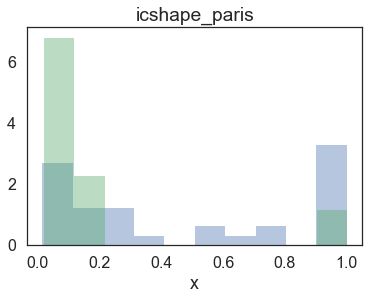

               x   y          a
count  30.000000  30  30.000000
mean    0.483333   1  54.574300
std     0.399889   0  18.000655
min     0.010000   1  30.799000
25%     0.092750   1  40.786250
50%     0.335000   1  52.407500
75%     0.960250   1  66.991750
max     1.000000   1  99.858000
               x   y          a
count  27.000000  27  27.000000
mean    0.345815   0  49.850037
std     0.391478   0  13.666648
min     0.010000   0  30.342000
25%     0.058000   0  40.945500
50%     0.162000   0  46.361000
75%     0.591500   0  57.379500
max     1.000000   0  86.462000


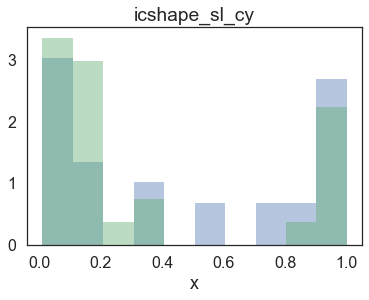

In [3]:
#fpr1,tpr1,_ = roc_curve(y, X1)
#roc_auc1 = auc(fpr1, tpr1)
filelist =['icshape_125','score_125','score_125_t500','score_125_ext70','score_125_ext150','icshape_paris','icshape_sl_cy']

fpr_list = []
tpr_list = []
roc_auc_list = []
#x_dic = {}
for i in range(len(X_test)):
    #print(i,X_test[i])
    #X_test[i]['y'] = pd.Series(y)
    X_test[i]['y'] = y
    X_test[i]['a'] = pd.Series(accessibility['c'])
    X_clean = X_test[i].dropna()
    X_select = X_clean[X_clean.a>=30]
    #X_select = X_select[X_select['y']!=0.5]
    X_select = X_select[X_select['x']>=0.01 ]
    #print(X_select['y'])
    #fpr,tpr,_ = roc_curve(X_clean['y'],X_clean['x'])
    fpr,tpr,_ = roc_curve(X_select['y'],X_select['x'])
    ml_125_ss = X_select[X_select.y==1]
    ml_125_ds = X_select[X_select.y==0]
    print(ml_125_ss.describe())
    print(ml_125_ds.describe())
    sns.distplot(ml_125_ss.dropna()['x'],norm_hist=True,kde=False, bins=10)
    sns.distplot(ml_125_ds.dropna()['x'],norm_hist=True,kde=False, bins=10)
    plt.title(filelist[i])
    plt.show()
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(auc(fpr_list[i],tpr_list[i]))


0
1
2
3
4
5
6


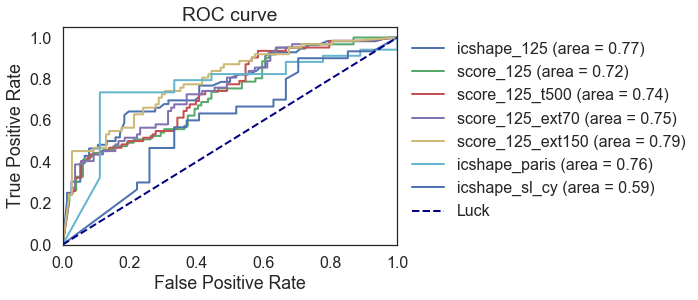

In [4]:
plt.figure()
lw = 2
#plt.plot(fpr1, tpr1, color='darkorange',
#         lw=lw, label='icshape_reactivity (area = %0.2f)' % roc_auc1)
#color = ['red','orange','green','purple','blue','black','yellow']
filelist =['icshape_125','score_125','score_125_t500','score_125_ext70','score_125_ext150','icshape_paris','icshape_sl_cy']
for i in range(len(X_test)):
    print (i)
    plt.plot(fpr_list[i],tpr_list[i],lw = lw,label = '%s (area = %0.2f)' %(filelist[i],roc_auc_list[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',label='Luck')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [ ]:
ml_125_ss = ml_125[ml_125.y==1]
ml_125_ds = ml_125[ml_125.y==0]
sns.distplot(ml_125_ss.dropna()['x'],norm_hist=True,kde=False, bins=20,fit=stats.beta)
sns.distplot(ml_125_ds.dropna()['x'],norm_hist=True,kde=False, bins=20,fit=stats.beta)
plt.show()